<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/2348564_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the preprocessed data
data.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
X = data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
rss = np.sum((y_pred - y_test) ** 2)
explained_variance = r2_score(y_test, y_pred)

# Adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Display the metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)
print('Adjusted R-squared:', adjusted_r2)
print('Residual Sum of Squares (RSS):', rss)
print('Explained Variance Score:', explained_variance)


Mean Absolute Error (MAE): 4181.19447375365
Mean Squared Error (MSE): 33596915.85136145
Root Mean Squared Error (RMSE): 5796.284659276273
R-squared (R2): 0.7835929767120724
Adjusted R-squared: 0.7769085898923681
Residual Sum of Squares (RSS): 9003973448.16487
Explained Variance Score: 0.7835929767120724


In [ ]:
# Get feature importance
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Display feature importance
print('Feature Importance:')
print(feature_importance)


Feature Importance:
smoker_yes          23651.128856
region_southwest      809.799354
region_southeast      657.864297
children              425.278784
region_northwest      370.677326
bmi                   337.092552
age                   256.975706
sex_male               18.591692
dtype: float64


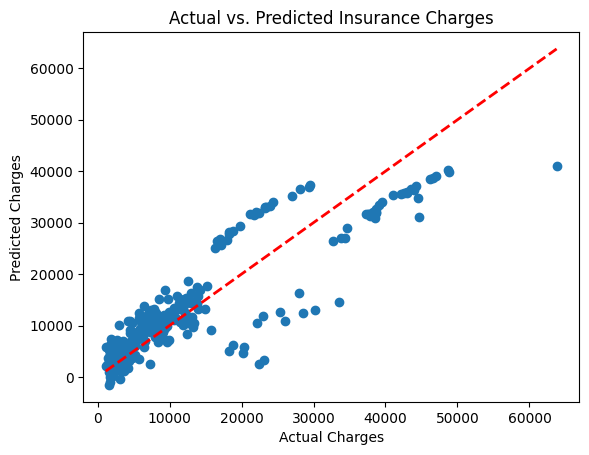

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.show()